In [73]:
'''
1. データセット用フォルダー「data」と
   学習済みの重み用フォルダー「weight」の作成
'''
import os

# 「data」フォルダーを
data_dir = "./data/"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

# 「weights」フォルダーを作成
weights_dir = "./weights/"
if not os.path.exists(weights_dir):
    os.mkdir(weights_dir)

In [74]:
%%time
'''
2. VOC2012のデータセットを
   Visual Object Classes Challenge 2012のサイトからダウンロード
'''
import urllib.request
import tarfile

# VOCデータセットのダウンロード先のURL
url = "http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar"
# data_dirにファイル名を連結してファイルパスを作成
target_path = os.path.join(data_dir, "VOCtrainval_11-May-2012.tar") 

if not os.path.exists(target_path):
    # urlにアクセスしてファイルパスtarget_pathとしてダウンロード
    urllib.request.urlretrieve(url, target_path)
    # ダウンロードしたtar形式ファイルを読み込む
    tar = tarfile.TarFile(target_path)      
    tar.extractall(data_dir)  # tarファイルを解凍
    tar.close()               # tarファイルをクローズ
    

CPU times: user 73 µs, sys: 39 µs, total: 112 µs
Wall time: 126 µs


In [75]:
%%time

url = 'https://s3.amazonaws.com/amdegroot-models/vgg16_reducedfc.pth'
target_path = os.path.join(weights_dir, 'vgg16_reducedfc.pth')

if not os.path.exists(target_path):
  urllib.request.urlretrieve(url, target_path)

CPU times: user 33 µs, sys: 0 ns, total: 33 µs
Wall time: 37 µs


In [76]:
%%time

url = 'https://s3.amazonaws.com/amdegroot-models/ssd300_mAP_77.43_v2.pth'
target_path = os.path.join(weights_dir, 'ssd300_mAP_77.43_v2.pth')

if not os.path.exists(target_path):
  urllib.request.urlretrieve(url, target_path)

CPU times: user 23 µs, sys: 13 µs, total: 36 µs
Wall time: 40.8 µs


In [77]:
from google.colab import drive
drive.mount('/content/drive')

import sys
ROOT_PATH = '/content/drive/MyDrive/MyColab'
sys.path.append(ROOT_PATH)

from voc import make_filepath_list

rootpath = './data/VOCdevkit/VOC2012/'
tr_img, tr_anno, \
    val_img, val_anno = make_filepath_list(rootpath)

print(tr_img[0])
print(tr_anno[0])
print(val_img[0])
print(val_anno[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
./data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000008.xml
./data/VOCdevkit/VOC2012/JPEGImages/2008_000002.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000002.xml


In [78]:
import sys
ROOT_PATH = '/content/drive/MyDrive/MyColab'
sys.path.append(ROOT_PATH)

import cv2
from voc import GetBBoxAndLabel

voc_labels = [
    'aeroplane','bicycle','bird','boat','bottle',
    'bus','car','cat','chair','cow',
    'diningtable','dog','horse','motorbike',
    'person','pottedplant','sheep','sofa','train',
    'tvmonitor',
]

annotation = GetBBoxAndLabel(voc_labels)

index = 1
img_path = val_img[index]
img = cv2.imread(img_path)
height, width, _ = img.shape

annotation(val_anno[index],
           width,
           height)

array([[ 0.09      ,  0.03003003,  0.998     ,  0.996997  , 18.        ],
       [ 0.122     ,  0.56756757,  0.164     ,  0.72672673, 14.        ]])

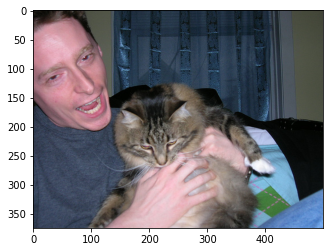

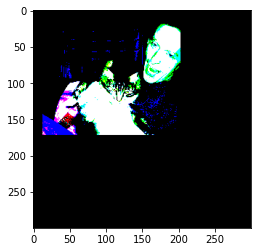

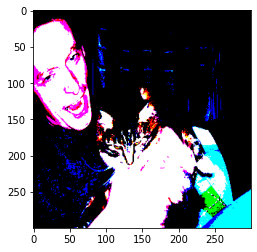

In [79]:
import sys
ROOT_PATH = '/content/drive/MyDrive/MyColab'
sys.path.append(ROOT_PATH)
import cv2
from voc import DataTransform
import matplotlib.pyplot as plt
%matplotlib inline

img_filepath = tr_img[19]
img = cv2.imread(img_filepath)
height, width, _ = img.shape

gbl = GetBBoxAndLabel(voc_labels)
bbox_label = gbl(tr_anno[19],
                 width, height)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

color_mean = (104, 117, 123)
input_size = 300

transform = DataTransform(input_size, color_mean)

phase = 'train'

img_transformed, boxes, labels = transform(
    img, 
    phase, 
    bbox_label[:, :4],
    bbox_label[:, 4])
plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

phase = 'val'
img_transformed, boxes, labels = transform(
    img, 
    phase, 
    bbox_label[:, :4],
    bbox_label[:, 4])
plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()


In [80]:
import sys
ROOT_PATH = '/content/drive/MyDrive/MyColab'
sys.path.append(ROOT_PATH)
import cv2
from voc import PreprocessVOC2012

color_mean = (104, 117, 123)
input_size = 300
print(tr_img[0])

tr_data = PreprocessVOC2012(
    tr_img,
    tr_anno,
    phase = 'train',
    transform = DataTransform(input_size, color_mean),
    get_bbox_label = GetBBoxAndLabel(voc_labels)
)
val_data = PreprocessVOC2012(
    val_img,
    val_anno,
    phase = 'val',
    transform = DataTransform(input_size, color_mean),
    get_bbox_label = GetBBoxAndLabel(voc_labels)
)

batch = tr_data.__getitem__(1)
print(len(batch))
print(batch[0].shape)
print(batch[1].shape)
print(batch)

./data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg
2
torch.Size([3, 300, 300])
(1, 5)
(tensor([[[  47.7733,   49.8331,   54.6173,  ...,  117.2560,  115.8350,
           116.8649],
         [  50.6674,   46.6303,   50.4210,  ...,  115.3266,  114.1082,
           115.9002],
         [  56.8552,   55.3447,   57.1463,  ...,  112.4326,  110.9751,
           111.8677],
         ...,
         [ -77.7646,  -88.7841,  -89.7361,  ..., -118.0267, -114.7672,
          -113.8747],
         [ -81.6755,  -84.7856,  -79.0539,  ..., -119.0409, -116.4699,
          -113.8747],
         [ -86.4988,  -72.0809,  -62.3168,  ..., -119.0892, -117.9941,
          -113.8747]],

        [[  30.3083,   32.3680,   35.4576,  ...,  112.8271,  111.4061,
           112.4360],
         [  29.3436,   25.3066,   28.6566,  ...,  110.8977,  109.6793,
           111.4713],
         [  31.9596,   30.4491,   32.2507,  ...,  108.0037,  106.5462,
           107.4388],
         ...,
         [ -55.2087,  -66.2282,  -66.0787,  .

In [81]:
import sys
ROOT_PATH = '/content/drive/MyDrive/MyColab'
sys.path.append(ROOT_PATH)
import torch.utils.data as data
from voc import multiobject_collate_fn

batch_size = 4

tr_batch = data.DataLoader(
    tr_data,
    batch_size = batch_size,
    shuffle = True,
    collate_fn = multiobject_collate_fn
)
val_batch = data.DataLoader(
    val_data,
    batch_size = batch_size,
    shuffle = False,
    collate_fn = multiobject_collate_fn
)

dataloaders_dict = {'train': tr_batch, 'val': val_batch}

print('訓練データのサイズ：', tr_data.__len__())
print('検証データのサイズ：', val_data.__len__())
print('訓練データのミニバッチの個数：', len(dataloaders_dict['train']))
print('検証データのミニバッチの個数：', len(dataloaders_dict['val']))

batch_iterator = iter(dataloaders_dict['train'])
images, targets = next(batch_iterator)
print('ミニバッチのイメージの形状：', images.size())
print('ミニバッチのtargetのサイズ：', len(targets))
print('targets[1]の形状:', targets[1].size())


訓練データのサイズ： 5717
検証データのサイズ： 5823
訓練データのミニバッチの個数： 1430
検証データのミニバッチの個数： 1456
ミニバッチのイメージの形状： torch.Size([4, 3, 300, 300])
ミニバッチのtargetのサイズ： 4
targets[1]の形状: torch.Size([1, 5])
